In [166]:
import scipy
import matplotlib.pyplot as plt
import numpy as np

# Data location

In [117]:
folder = '/Users/gam24/Documents/research/frontend/2013_pSO/analysis/archive/Final_solution/170606_GM_massbalance/'

# Geostrophic velocities

In [180]:
localfolder = 'gvel/'
# ANDREX
file = 'gvel_andrex_final_mass_postclosure.mat'
gvel_anx = scipy.io.loadmat(folder+localfolder+file)
# I6S
file = 'gvel_i6s_final_mass_postclosure.mat'
gvel_i6s = scipy.io.loadmat(folder+localfolder+file)
# Combine arrays
gvel = np.concatenate((gvel_anx['gvel'],gvel_i6s['gvel']),1)

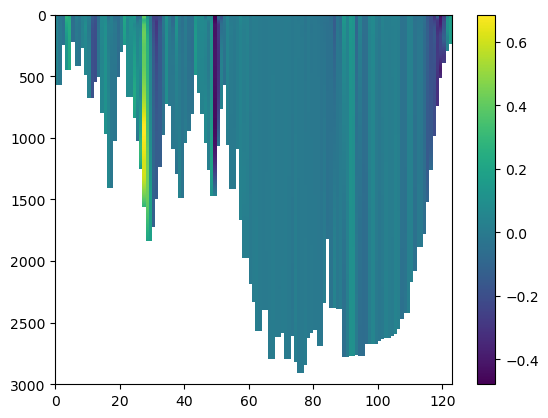

In [186]:
plt.pcolormesh(gvel)
plt.gca().invert_yaxis()
plt.colorbar()

# Inverse model solution

In [189]:
localfolder = 'output/'
file = 'dobox_mass_frompostclosure_eddycice-densa-carbon_carbon.mat'
ds = scipy.io.loadmat(folder+localfolder+file)

The velocity correction is in the array called `x`. It has dimensions 1x123, where the 123 is all of the stations in both the I6S and ANDREX sections. It needs to be added point-wise to the geostrophic velocities above to recover the inverse model solution for the velocity field.

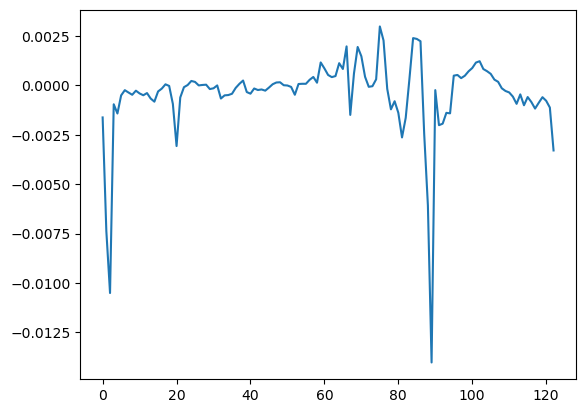

In [192]:
plt.plot(ds['x'])

# Absolute velocity

In [207]:
avel = gvel + np.tile(ds['x'],3000).T # .T here transposes this array to match the shape of gvel

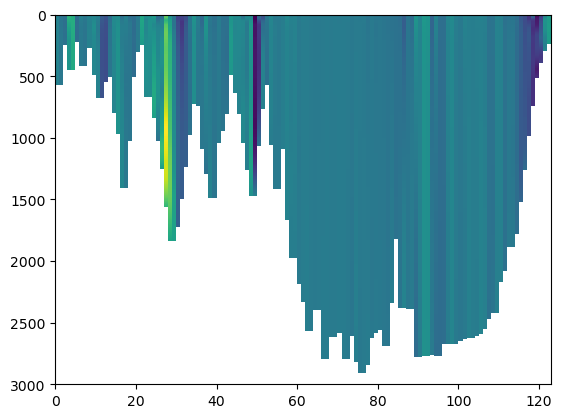

In [211]:
plt.pcolormesh(avel)
plt.gca().invert_yaxis()

# Station locations, and tracer data interpolated to ANDREX and I6S sections

In [219]:
localfolder = 'prep/'
# ANDREX section
file = 'andrex_prep_carbon_densa.mat'
anx = scipy.io.loadmat(folder+localfolder+file)
# I6S section
file = 'i6s_prep_carbon_densa.mat'
i6s = scipy.io.loadmat(folder+localfolder+file)

In [220]:
for key in anx.keys():
    print(key)

__header__
__version__
__globals__
Area_densa
Area_dic
Area_dic_pm3
Area_diccarb
Area_diccarb_pm3
Area_dicres
Area_dicres_pm3
Area_dicsatpi
Area_dicsatpi_pm3
Area_dicsoft
Area_dicsoft_pm3
Area_ptmpa
Area_sala
Area_volume
LayerPair_densa
LayerPair_dic
LayerPair_dic_pm3
LayerPair_diccarb
LayerPair_diccarb_pm3
LayerPair_dicres
LayerPair_dicres_pm3
LayerPair_dicsatpi
LayerPair_dicsatpi_pm3
LayerPair_dicsoft
LayerPair_dicsoft_pm3
LayerPair_ptmpa
LayerPair_sala
LayerPair_volume
binPair_densa
binPair_dic
binPair_dic_pm3
binPair_diccarb
binPair_diccarb_pm3
binPair_dicres
binPair_dicres_pm3
binPair_dicsatpi
binPair_dicsatpi_pm3
binPair_dicsoft
binPair_dicsoft_pm3
binPair_ptmpa
binPair_sala
binPair_volume
bin_densa
bin_dic
bin_dic_pm3
bin_diccarb
bin_diccarb_pm3
bin_dicres
bin_dicres_pm3
bin_dicsatpi
bin_dicsatpi_pm3
bin_dicsoft
bin_dicsoft_pm3
bin_ptmp
bin_ptmpa
bin_sal
bin_sala
bin_temp
bin_volume
corrpress
rootdir
tracerdir
tracerfile
raw_filename
properties
sectfile
ans
command
nsurfs
nstati

`lat` and `lon` correspond to the stations locations.  
Variables beginning `bin` or `binPair` are interpolated in pressure bins (the `Pair` means it is the average between station pairs.  
Variables beginning `Layer` are the average in neutral density layers.

# Eddy transports
These are section-integrated eddy volume transports in each neutral density layer. I believe they were derived from a SOSE simulation and are used in the inverse model calculation.

In [234]:
localfolder = 'eddytransport/'
file = 'eddy_fluxes_fromPete.mat'
eddy = scipy.io.loadmat(folder+localfolder+file)

In [236]:
eddy['vh_layer']

array([[-338257. ],
       [ 190845.7],
       [  92254. ],
       [  47743.5],
       [  47765.7],
       [-322827.6],
       [ -13930.5],
       [ -43582.1],
       [   8680.4],
       [  -4993.2]])